In [15]:
# import packages

import numpy as np
import pandas as pd
import time
import scipy
from sympy import *


# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from utils import gather_data, get_subj_index, cosinor, visualize_data

In [5]:
data_path = 'data/'

In [6]:
df = pd.read_csv(data_path + 'scores.csv')

In [7]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [9]:
duplicates = df[df.duplicated()]
print("Number of duplications:", len(duplicates))

Number of duplications: 0


In [10]:
# Check for the missing values
df.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [11]:
len(df)

55

In [12]:
Ncontr = 32 # number of control subjects
Ncond  = 23 # number of condition subjects
minutesinaday = 1439 # from 00:00 to 23:59 there are 1439 minutes

counter = 1
for subj in range(1,Ncontr):
    cohort = "control"
    
    days = gather_data(cohort,subj)
    ndays = days.shape[0];
    label = np.zeros(ndays,dtype = int)
    subj_id= np.ones(ndays,dtype = int) * counter
    counter=counter+1
    
    if subj == 1: # array init
        Y = label 
        X = days
        ID= subj_id 
        
    else:         # array expansion
        X = np.vstack((X,days))
        Y = np.hstack((Y,label))
        ID= np.hstack((ID,subj_id))
        
    
for subj in range(1, Ncond):
    cohort = "condition"
    
    days = gather_data(cohort,subj)
    ndays = days.shape[0];
    label = np.ones(ndays,dtype = int)
    subj_id= np.ones(ndays,dtype = int) * counter
    counter=counter+1
    
    X = np.vstack((X,days))
    Y = np.hstack((Y,label))
    ID= np.hstack((ID,subj_id))
    
print("Actigraphy data structure > X:", X.shape,"(n. of days x minutes in a day)")
print("Labels > Y:", Y.shape,"(n. of days)")
print("subj. id stored in ID :\n", np.unique(ID))

/Users/mohammad/Documents/mohammad/Study/Alto/Autumn 1-2/Digital Health/code_proj/DH_course/utils.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t = timestamps.iloc[i][0]
/Users/mohammad/Documents/mohammad/Study/Alto/Autumn 1-2/Digital Health/code_proj/DH_course/utils.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t = timestamps.iloc[i][0]
/Users/mohammad/Documents/mohammad/Study/Alto/Autumn 1-2/Digital Health/code_proj/DH_course/utils.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

Actigraphy data structure > X: (974, 1439) (n. of days x minutes in a day)
Labels > Y: (974,) (n. of days)
subj. id stored in ID :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]


# Cleaning data

original dataset size:  (974, 1439)
 cleaned dataset size:  (761, 1439)


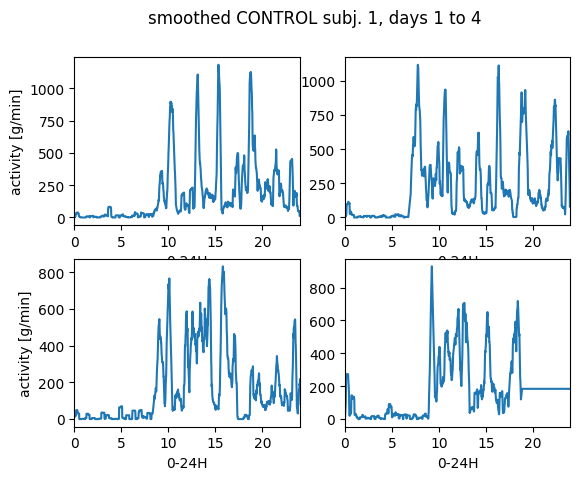

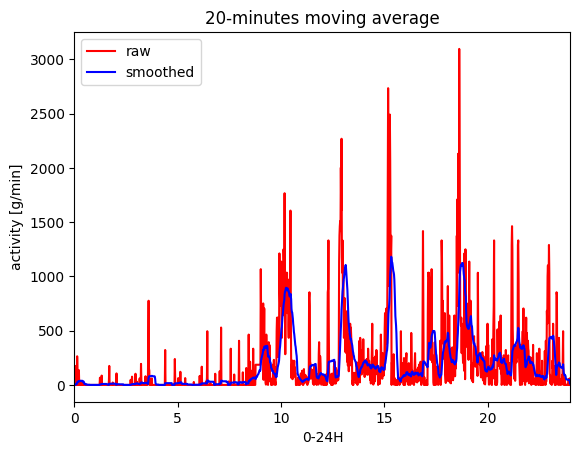

In [13]:
ax = np.arange(0, 24+0.0167, 0.0167) # X-Axis to plot 0-24H

threshold = 25 
X_mean = np.mean(X,axis=1)
sus = np.where(X_mean<threshold)
sus = sus[0]

print("original dataset size: ",X.shape)
X = np.delete(X,sus,axis=0)
Y = np.delete(Y,sus,axis=0)
ID= np.delete(ID,sus,axis=0)
print(" cleaned dataset size: ",X.shape)

# input: time series ==> output: smoothed time series
def smooth(day,win):
    from scipy import signal
    import numpy as np
    
    L = win #L-point Moving Average filter
    b = (np.ones(L))/L #numerator co-effs of filter transfer function
    a = np.ones(1)   #denominator co-effs of filter transfer function
    x = day 
    y = signal.lfilter(b,a,x) #filter output using lfilter function
    return y

# 20-Minutes Moving Average Filter
window = 20
for i in range(0,X.shape[0]):
    day = X[i]
    smoothed_day = smooth(day,window)
    
    if i==0: 
        X_smooth = smoothed_day
    else: 
        X_smooth = np.vstack((X_smooth,smoothed_day))

    
plt.figure()
plt.subplot(2,2,1)
plt.plot(ax, X_smooth[0])
plt.ylabel("activity [g/min]"), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(2,2,2)
plt.plot(ax, X_smooth[1])
plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(2,2,3)
plt.plot(ax, X_smooth[2])
plt.ylabel("activity [g/min]"), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(2,2,4)
plt.plot(ax, X_smooth[3])
plt.xlabel("0-24H"),plt.xlim(0,24)
plt.suptitle("smoothed CONTROL subj. 1, days 1 to 4")

plt.figure()
plt.title("20-minutes moving average")
plt.plot(ax,X[0],color='r',label="raw"),plt.ylabel("activity [g/min]")
plt.plot(ax,X_smooth[0],color='b',label="smoothed"),plt.xlabel("0-24H"),plt.xlim(0,24)
plt.legend()
plt.show()

control size:  (463, 1439)
condition size:  (297, 1439)


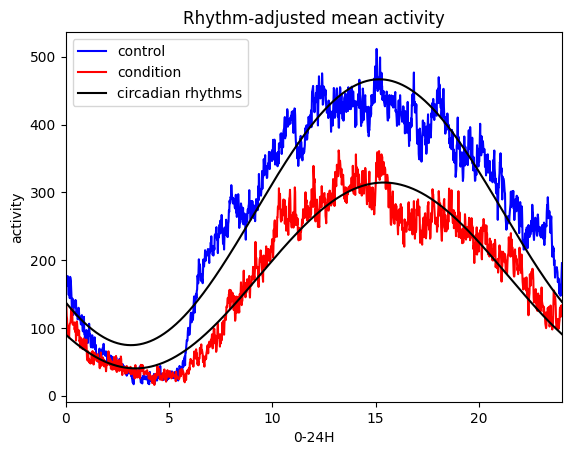

In [18]:
# get index of last control subj to separate the groups
istart,iend = get_subj_index("control",Ncontr,ID)

# rhythm-adjusted control mean
control = X[:iend]
print("control size: ",control.shape)
control_mean = np.mean(control,axis=0)

# rhythm-adjusted condition mean
condition = X[iend+1:]
print("condition size: ",condition.shape)
condition_mean = np.mean(condition,axis=0)

# Circaian Rhythms
t = np.linspace(0,360-(360/1439),1439)
control_circadian_rh,control_MESOR,Amp,control_acro = cosinor(t,control_mean)
condition_circadian_rh,conition_MESOR,Amp,condition_acro = cosinor(t,condition_mean)

plt.figure()
plt.plot(ax,control_mean, color='b', label="control")
plt.plot(ax,condition_mean,color='r',label="condition")
plt.xlabel("0-24H"),plt.ylabel("activity  [g/min]"),plt.xlim(0,24)
visualize_data(ax,control_circadian_rh,style="plot",col="black",l='circadian rhythms')
visualize_data(ax,condition_circadian_rh,style="plot",col="black",T="Rhythm-adjusted mean activity",xl='0-24H',yl='activity')

plt.legend()

In [21]:
MADRS1 = np.array(df["madrs1"])
MADRS2 = np.array(df["madrs2"])
MADRS = np.vstack((MADRS1,MADRS2))

# discard Nan (healty subjects),keep the average of only condition subjects for convenience
import math
nanvals = np.where(np.isnan(MADRS))
MADRS = np.delete(MADRS, nanvals[1], 1)

MADRS = np.mean(MADRS, axis = 0)

/Users/mohammad/Documents/mohammad/Study/Alto/Autumn 1-2/Digital Health/code_proj/DH_course/utils.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t = timestamps.iloc[i][0]
/Users/mohammad/Documents/mohammad/Study/Alto/Autumn 1-2/Digital Health/code_proj/DH_course/utils.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t = timestamps.iloc[i][0]
/Users/mohammad/Documents/mohammad/Study/Alto/Autumn 1-2/Digital Health/code_proj/DH_course/utils.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

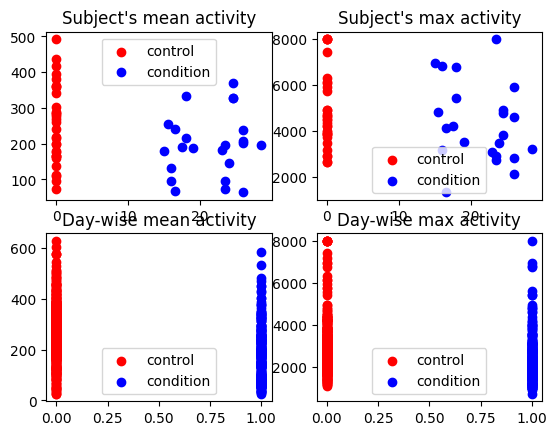

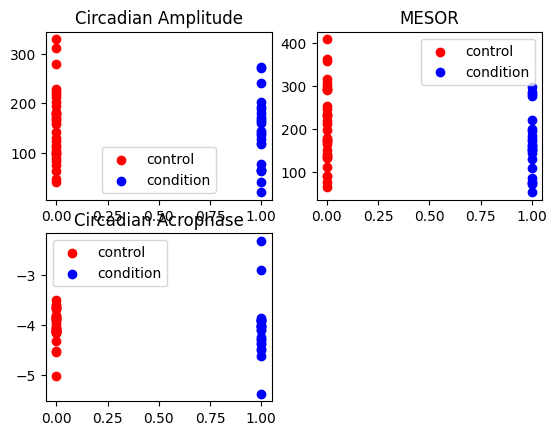

In [22]:
# subject-wise mean, max activity and circadian rhythm
for subj in range(0,Ncontr):
    subj_data = gather_data("control",subj+1)
    
    # we fit circadian rhythm on subject 24H activity rhythm
    rhythm = np.mean(subj_data,axis=0)
    
    # take only day time hours (from 5am)
    begin = 60* 5 
    
    subj_data = np.delete(subj_data, range(0,begin),axis = 1)
    subj_mean = np.mean(subj_data)
    subj_max  = np.max(subj_data)
    f,subj_MESOR,subj_amp,subj_acrophase = cosinor(t,rhythm)
    
    if subj == 0:
        control_subj_mean = subj_mean
        control_subj_max  = np.array(subj_max)
        control_acro = np.array(subj_acrophase)
        control_amp  = np.array(subj_amp)
        control_MESOR= np.array(subj_MESOR)
    else:
        control_subj_mean = np.hstack((control_subj_mean, subj_mean))
        control_subj_max = np.hstack((control_subj_max,subj_max))
        control_acro = np.hstack((control_acro, subj_acrophase))
        control_amp  = np.hstack((control_amp,subj_amp))
        control_MESOR= np.hstack((control_MESOR,subj_MESOR))
        
axe = np.zeros(Ncontr, dtype=float) 
    
for subj in range(0,Ncond):
    subj_data = gather_data("condition",subj+1)
    # we fit circadian rhythm on subject 24H activity rhythm
    rhythm = np.mean(subj_data,axis=0)
    
    # take only day time hours (from 5am)
    begin = 60* 5 

    
    subj_data = np.delete(subj_data, range(0,begin),axis = 1)
    subj_mean = np.mean(subj_data)
    subj_max  = np.max(subj_data)
    f,subj_MESOR,subj_amp,subj_acrophase = cosinor(t,rhythm)
    
    if subj == 0:
        condition_subj_mean = subj_mean
        condition_subj_max  = np.array(subj_max)
        condition_acro = np.array(subj_acrophase)
        condition_amp  = np.array(subj_amp)
        condition_MESOR= np.array(subj_MESOR)
    else:
        condition_subj_mean = np.hstack((condition_subj_mean, subj_mean))
        condition_subj_max = np.hstack((condition_subj_max,subj_max))
        condition_acro = np.hstack((condition_acro, subj_acrophase))
        condition_amp  = np.hstack((condition_amp,subj_amp))
        condition_MESOR= np.hstack((condition_MESOR,subj_MESOR))
        
# day-wise max activity
control_day_max = np.amax(control,axis=1)
condition_day_max=np.amax(condition,axis=1)

# day-wise mean activity
control_day_mean   = np.mean(control,axis = 1)
condition_day_mean = np.mean(condition,axis = 1)

plt.figure()
plt.subplot(2,2,1)
visualize_data(np.zeros(Ncontr, dtype=float), control_subj_mean, style="scatter",col="red",T="",l="control")
visualize_data(MADRS, condition_subj_mean,style="scatter",col="blue",T="Subject's mean activity",l="condition")
plt.legend()

plt.subplot(2,2,2)
visualize_data(np.zeros(Ncontr, dtype=float), control_subj_max, style="scatter",col="red",T="",l="control")
visualize_data(MADRS, condition_subj_max,style="scatter",col="blue",T="Subject's max activity",l="condition")
plt.legend()

plt.subplot(2,2,4)
visualize_data(np.zeros(len(control_day_max)), control_day_max, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_day_max)), condition_day_max,style="scatter",col="blue",T="Day-wise max activity",l="condition")
plt.legend()
               
plt.subplot(2,2,3)
visualize_data(np.zeros(len(control_day_mean)), control_day_mean, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_day_mean)), condition_day_mean,style="scatter",col="blue",T="Day-wise mean activity",l="condition")
plt.legend()
plt.show()

plt.figure()
plt.subplot(2,2,1)
visualize_data(np.zeros(len(control_amp)), control_amp, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_amp)), condition_amp,style="scatter",col="blue",T="Circadian Amplitude",l="condition")
plt.legend()
plt.subplot(2,2,2)
visualize_data(np.zeros(len(control_MESOR)), control_MESOR, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_MESOR)), condition_MESOR,style="scatter",col="blue",T="MESOR",l="condition")
plt.legend()
plt.subplot(2,2,3)
visualize_data(np.zeros(len(control_acro)), control_acro, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_acro)), condition_acro,style="scatter",col="blue",T="Circadian Acrophase",l="condition")
plt.legend()
plt.show()